In [1]:
import h5py
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
def load_h5py(filename):
    with h5py.File(filename, 'r') as hf:
        X = hf['X'][:]
        Y = hf['Y'][:]
    return X, Y

In [3]:
x,y=load_h5py('./dataset_partA.h5')



x_arr=[]

for xi in x:
    x_arr.append(np.reshape(xi,xi.size))

x=x_arr

#number_of_samples=len(y)
#num_train=int(number_of_samples*0.7)
#num_test=int(number_of_samples*0.30)
#random_indices = np.random.permutation(number_of_samples)
#x_train = x[random_indices[:num_train]]
#x_test = x[random_indices[num_train]]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [4]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
model=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(100,50), verbose=100, random_state=1) 

#activation: logistic, relu, tanh

In [6]:
model.fit(x_train,y_train)

Iteration 1, loss = 0.69365387
Iteration 2, loss = 0.69081101
Iteration 3, loss = 0.68878638
Iteration 4, loss = 0.68673526
Iteration 5, loss = 0.68466606
Iteration 6, loss = 0.68240988
Iteration 7, loss = 0.68000635
Iteration 8, loss = 0.67743015
Iteration 9, loss = 0.67463612
Iteration 10, loss = 0.67151492
Iteration 11, loss = 0.66806846
Iteration 12, loss = 0.66422878
Iteration 13, loss = 0.65986617
Iteration 14, loss = 0.65499431
Iteration 15, loss = 0.64940757
Iteration 16, loss = 0.64304251
Iteration 17, loss = 0.63577869
Iteration 18, loss = 0.62753378
Iteration 19, loss = 0.61803309
Iteration 20, loss = 0.60723373
Iteration 21, loss = 0.59489839
Iteration 22, loss = 0.58099471
Iteration 23, loss = 0.56535776
Iteration 24, loss = 0.54791452
Iteration 25, loss = 0.52873202
Iteration 26, loss = 0.50793921
Iteration 27, loss = 0.48567177
Iteration 28, loss = 0.46242169
Iteration 29, loss = 0.43853099
Iteration 30, loss = 0.41442990
Iteration 31, loss = 0.39073204
Iteration 32, los

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=100,
       warm_start=False)

In [7]:
predicted=model.predict(x_test)

print(accuracy_score(y_test, predicted)*100)

96.3233230424


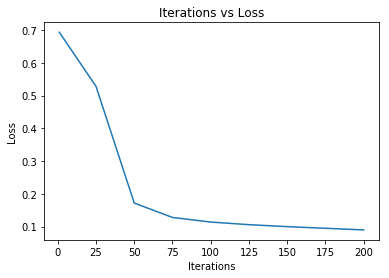

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

iteration=[1,25,50,75,100,125,150,175,200]
lossval=[0.693,0.528,0.172,0.128,0.114,0.106,0.100,0.095,0.090]

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations vs Loss')
plt.plot(iteration,lossval)

In [11]:
from sklearn.externals import joblib
joblib.dump(model, 'q2_1.pkl') 

['q2_1.pkl']